In [17]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [18]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
num_steps_train_discriminator = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [19]:

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [20]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [21]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [22]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [23]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [24]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [25]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [26]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [27]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [28]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [29]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

In [30]:
torch.manual_seed(7777)

def generator_loss(generator_output):
    ############ YOUR CODE HERE ##########
     gen_disc_output = discriminator(generator_output)
     loss = criterion(gen_disc_output, label_real(len(gen_disc_output)))
     return loss
    
    
    ######################################
    
def discriminator_loss(discriminator_output_fake, discriminator_output_true):
    ############ YOUR CODE HERE ##########
    loss_fake = criterion(discriminator_output_fake, label_fake(len(discriminator_output_fake)))
    loss_real = criterion(discriminator_output_true, label_real(len(discriminator_output_true)))
    
    return loss_fake, loss_real
    
    ######################################

# Q. Write training loop

118it [25:16, 12.85s/it]


Epoch 1 of 100
Generator loss: 23.04801801, Discriminator loss: 0.22887389


118it [01:41,  1.17it/s]


Epoch 2 of 100
Generator loss: 29.02275868, Discriminator loss: 0.09095433


118it [01:38,  1.19it/s]


Epoch 3 of 100
Generator loss: 13.60857721, Discriminator loss: 0.38205331


118it [01:40,  1.18it/s]


Epoch 4 of 100
Generator loss: 7.32091024, Discriminator loss: 0.51711745


118it [01:36,  1.22it/s]


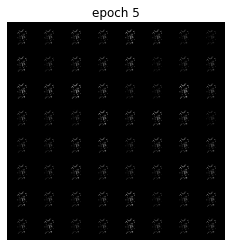

Epoch 5 of 100
Generator loss: 3.93538349, Discriminator loss: 0.38292490


118it [01:38,  1.20it/s]


Epoch 6 of 100
Generator loss: 4.28618258, Discriminator loss: 0.55252608


118it [01:38,  1.20it/s]


Epoch 7 of 100
Generator loss: 5.42954352, Discriminator loss: 0.32884988


118it [01:37,  1.21it/s]


Epoch 8 of 100
Generator loss: 4.41840025, Discriminator loss: 0.34312273


118it [01:37,  1.22it/s]


Epoch 9 of 100
Generator loss: 6.60120135, Discriminator loss: 0.28529286


118it [01:38,  1.20it/s]


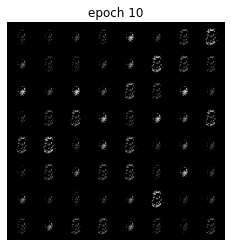

Epoch 10 of 100
Generator loss: 4.05582402, Discriminator loss: 0.37285625


118it [01:36,  1.22it/s]


Epoch 11 of 100
Generator loss: 5.07397314, Discriminator loss: 0.28994253


118it [01:37,  1.22it/s]


Epoch 12 of 100
Generator loss: 5.82064046, Discriminator loss: 0.26420076


118it [01:38,  1.20it/s]


Epoch 13 of 100
Generator loss: 4.59517480, Discriminator loss: 0.32295770


118it [01:35,  1.23it/s]


Epoch 14 of 100
Generator loss: 5.82809190, Discriminator loss: 0.18089264


118it [01:37,  1.21it/s]


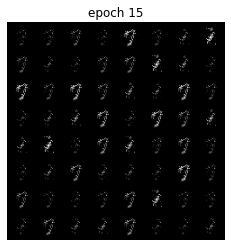

Epoch 15 of 100
Generator loss: 5.77400741, Discriminator loss: 0.11494228


118it [01:37,  1.22it/s]


Epoch 16 of 100
Generator loss: 5.91888647, Discriminator loss: 0.20353530


118it [01:36,  1.22it/s]


Epoch 17 of 100
Generator loss: 5.74738149, Discriminator loss: 0.20815992


118it [01:36,  1.22it/s]


Epoch 18 of 100
Generator loss: 5.87224766, Discriminator loss: 0.22040523


118it [01:37,  1.21it/s]


Epoch 19 of 100
Generator loss: 5.66732821, Discriminator loss: 0.18557104


118it [01:36,  1.22it/s]


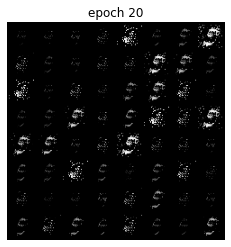

Epoch 20 of 100
Generator loss: 5.83931815, Discriminator loss: 0.22670751


118it [01:36,  1.22it/s]


Epoch 21 of 100
Generator loss: 5.26371299, Discriminator loss: 0.31419354


118it [01:37,  1.21it/s]


Epoch 22 of 100
Generator loss: 5.31658909, Discriminator loss: 0.21080410


118it [01:35,  1.23it/s]


Epoch 23 of 100
Generator loss: 4.36053816, Discriminator loss: 0.42050733


118it [01:38,  1.20it/s]


Epoch 24 of 100
Generator loss: 3.95302392, Discriminator loss: 0.36329436


118it [01:39,  1.18it/s]


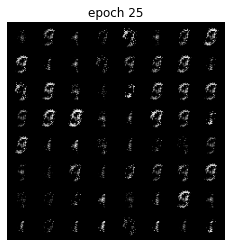

Epoch 25 of 100
Generator loss: 3.74121447, Discriminator loss: 0.37813133


118it [01:37,  1.21it/s]


Epoch 26 of 100
Generator loss: 4.17955966, Discriminator loss: 0.29211565


118it [01:37,  1.21it/s]


Epoch 27 of 100
Generator loss: 4.28008605, Discriminator loss: 0.29200094


118it [01:36,  1.22it/s]


Epoch 28 of 100
Generator loss: 4.29919091, Discriminator loss: 0.30222939


118it [01:37,  1.21it/s]


Epoch 29 of 100
Generator loss: 4.24251203, Discriminator loss: 0.33287927


118it [01:38,  1.20it/s]


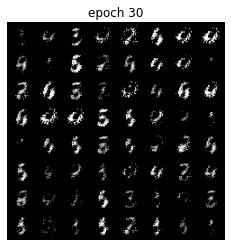

Epoch 30 of 100
Generator loss: 4.12206000, Discriminator loss: 0.32071694


118it [01:38,  1.20it/s]


Epoch 31 of 100
Generator loss: 4.24600447, Discriminator loss: 0.31884930


118it [01:37,  1.21it/s]


Epoch 32 of 100
Generator loss: 3.96084132, Discriminator loss: 0.31399891


118it [01:39,  1.19it/s]


Epoch 33 of 100
Generator loss: 3.82209980, Discriminator loss: 0.32345783


118it [01:36,  1.22it/s]


Epoch 34 of 100
Generator loss: 3.79048914, Discriminator loss: 0.39678070


118it [01:36,  1.22it/s]


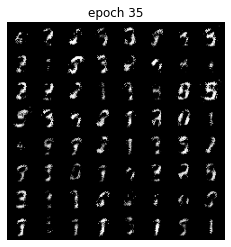

Epoch 35 of 100
Generator loss: 3.48903150, Discriminator loss: 0.42577884


118it [01:39,  1.19it/s]


Epoch 36 of 100
Generator loss: 3.40249918, Discriminator loss: 0.35522917


118it [01:37,  1.21it/s]


Epoch 37 of 100
Generator loss: 3.56658774, Discriminator loss: 0.38074826


118it [01:40,  1.18it/s]


Epoch 38 of 100
Generator loss: 3.66479296, Discriminator loss: 0.37665807


118it [01:37,  1.21it/s]


Epoch 39 of 100
Generator loss: 3.71529502, Discriminator loss: 0.34913268


118it [01:36,  1.22it/s]


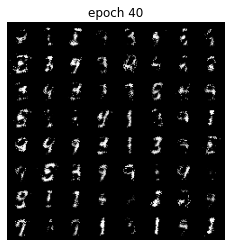

Epoch 40 of 100
Generator loss: 3.59251460, Discriminator loss: 0.44298562


118it [01:36,  1.22it/s]


Epoch 41 of 100
Generator loss: 3.33135253, Discriminator loss: 0.48550739


118it [01:37,  1.21it/s]


Epoch 42 of 100
Generator loss: 3.16183616, Discriminator loss: 0.43401487


118it [01:37,  1.21it/s]


Epoch 43 of 100
Generator loss: 3.23302969, Discriminator loss: 0.43260028


118it [01:35,  1.23it/s]


Epoch 44 of 100
Generator loss: 3.21224316, Discriminator loss: 0.41057765


118it [01:39,  1.19it/s]


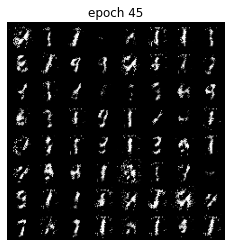

Epoch 45 of 100
Generator loss: 3.18754573, Discriminator loss: 0.45735231


118it [01:36,  1.22it/s]


Epoch 46 of 100
Generator loss: 3.24823549, Discriminator loss: 0.47329565


118it [01:38,  1.20it/s]


Epoch 47 of 100
Generator loss: 3.27810073, Discriminator loss: 0.39689760


118it [01:38,  1.20it/s]


Epoch 48 of 100
Generator loss: 3.33614446, Discriminator loss: 0.42097420


118it [01:37,  1.21it/s]


Epoch 49 of 100
Generator loss: 3.16504566, Discriminator loss: 0.46066649


118it [01:38,  1.20it/s]


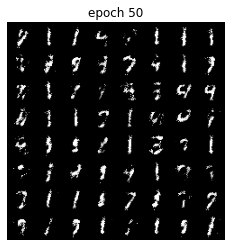

Epoch 50 of 100
Generator loss: 2.87175652, Discriminator loss: 0.49760469


118it [01:38,  1.19it/s]


Epoch 51 of 100
Generator loss: 3.02677907, Discriminator loss: 0.44808790


118it [01:37,  1.21it/s]


Epoch 52 of 100
Generator loss: 3.11738812, Discriminator loss: 0.46929510


118it [01:38,  1.20it/s]


Epoch 53 of 100
Generator loss: 2.93778757, Discriminator loss: 0.48163388


118it [01:38,  1.20it/s]


Epoch 54 of 100
Generator loss: 3.00207240, Discriminator loss: 0.49055219


118it [01:37,  1.21it/s]


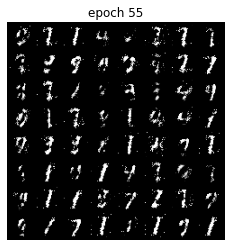

Epoch 55 of 100
Generator loss: 3.01625632, Discriminator loss: 0.47659907


118it [01:37,  1.21it/s]


Epoch 56 of 100
Generator loss: 2.93610574, Discriminator loss: 0.50884240


118it [01:38,  1.20it/s]


Epoch 57 of 100
Generator loss: 2.74220861, Discriminator loss: 0.52138920


118it [01:37,  1.22it/s]


Epoch 58 of 100
Generator loss: 2.95623050, Discriminator loss: 0.50314757


118it [01:36,  1.22it/s]


Epoch 59 of 100
Generator loss: 2.99110482, Discriminator loss: 0.48785910


118it [01:38,  1.19it/s]


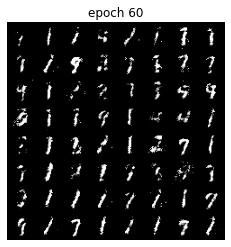

Epoch 60 of 100
Generator loss: 2.86413031, Discriminator loss: 0.49103940


118it [01:38,  1.20it/s]


Epoch 61 of 100
Generator loss: 2.77619962, Discriminator loss: 0.51599769


118it [01:39,  1.19it/s]


Epoch 62 of 100
Generator loss: 2.72756310, Discriminator loss: 0.55268377


118it [01:39,  1.19it/s]


Epoch 63 of 100
Generator loss: 2.68887343, Discriminator loss: 0.55579530


118it [01:37,  1.21it/s]


Epoch 64 of 100
Generator loss: 2.53788715, Discriminator loss: 0.58523780


118it [01:38,  1.20it/s]


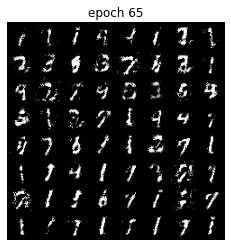

Epoch 65 of 100
Generator loss: 2.49674542, Discriminator loss: 0.60042551


118it [01:38,  1.20it/s]


Epoch 66 of 100
Generator loss: 2.38044277, Discriminator loss: 0.63169981


118it [01:36,  1.22it/s]


Epoch 67 of 100
Generator loss: 2.52531083, Discriminator loss: 0.60678203


118it [01:37,  1.21it/s]


Epoch 68 of 100
Generator loss: 2.46084266, Discriminator loss: 0.62945513


118it [01:37,  1.21it/s]


Epoch 69 of 100
Generator loss: 2.63757618, Discriminator loss: 0.60438585


118it [01:37,  1.21it/s]


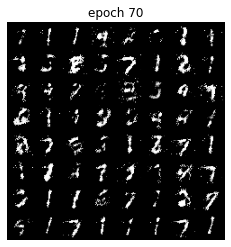

Epoch 70 of 100
Generator loss: 2.44205653, Discriminator loss: 0.61217759


118it [01:36,  1.22it/s]


Epoch 71 of 100
Generator loss: 2.47379969, Discriminator loss: 0.62460686


118it [01:37,  1.21it/s]


Epoch 72 of 100
Generator loss: 2.41512557, Discriminator loss: 0.62130977


118it [01:37,  1.21it/s]


Epoch 73 of 100
Generator loss: 2.57968326, Discriminator loss: 0.63695989


118it [01:37,  1.21it/s]


Epoch 74 of 100
Generator loss: 2.34298075, Discriminator loss: 0.65659110


118it [01:38,  1.20it/s]


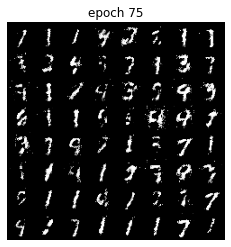

Epoch 75 of 100
Generator loss: 2.29952492, Discriminator loss: 0.65574632


118it [01:37,  1.21it/s]


Epoch 76 of 100
Generator loss: 2.39093990, Discriminator loss: 0.63428341


118it [01:37,  1.21it/s]


Epoch 77 of 100
Generator loss: 2.43452609, Discriminator loss: 0.63172563


118it [01:39,  1.19it/s]


Epoch 78 of 100
Generator loss: 2.35091839, Discriminator loss: 0.67201495


118it [01:37,  1.21it/s]


Epoch 79 of 100
Generator loss: 2.27494822, Discriminator loss: 0.70045534


118it [01:37,  1.21it/s]


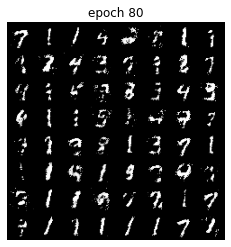

Epoch 80 of 100
Generator loss: 2.12896229, Discriminator loss: 0.69055467


118it [01:39,  1.19it/s]


Epoch 81 of 100
Generator loss: 2.18388471, Discriminator loss: 0.69717814


118it [01:37,  1.21it/s]


Epoch 82 of 100
Generator loss: 2.26466993, Discriminator loss: 0.69964581


118it [01:37,  1.21it/s]


Epoch 83 of 100
Generator loss: 1.91867221, Discriminator loss: 0.78944968


118it [01:39,  1.19it/s]


Epoch 84 of 100
Generator loss: 2.00204874, Discriminator loss: 0.77464044


118it [01:37,  1.21it/s]


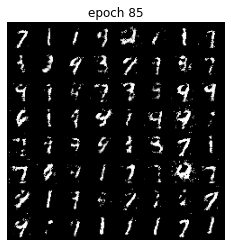

Epoch 85 of 100
Generator loss: 1.95957426, Discriminator loss: 0.77765392


118it [01:38,  1.20it/s]


Epoch 86 of 100
Generator loss: 2.02316304, Discriminator loss: 0.73641870


118it [01:39,  1.19it/s]


Epoch 87 of 100
Generator loss: 2.11142599, Discriminator loss: 0.73341071


118it [01:37,  1.21it/s]


Epoch 88 of 100
Generator loss: 2.02759792, Discriminator loss: 0.77294832


118it [01:37,  1.21it/s]


Epoch 89 of 100
Generator loss: 1.91581620, Discriminator loss: 0.77176338


118it [01:37,  1.20it/s]


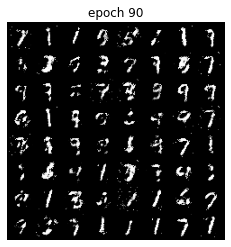

Epoch 90 of 100
Generator loss: 1.89218003, Discriminator loss: 0.80805138


118it [01:37,  1.21it/s]


Epoch 91 of 100
Generator loss: 1.99551895, Discriminator loss: 0.76371386


118it [01:38,  1.20it/s]


Epoch 92 of 100
Generator loss: 2.08214142, Discriminator loss: 0.74866922


118it [01:38,  1.20it/s]


Epoch 93 of 100
Generator loss: 2.04331646, Discriminator loss: 0.76863516


118it [01:38,  1.20it/s]


Epoch 94 of 100
Generator loss: 2.05284850, Discriminator loss: 0.73540274


118it [01:37,  1.21it/s]


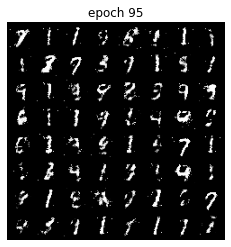

Epoch 95 of 100
Generator loss: 1.96730122, Discriminator loss: 0.79757216


118it [01:38,  1.20it/s]


Epoch 96 of 100
Generator loss: 1.95085835, Discriminator loss: 0.81007873


118it [01:38,  1.20it/s]


Epoch 97 of 100
Generator loss: 1.96567747, Discriminator loss: 0.77143209


118it [01:37,  1.21it/s]


Epoch 98 of 100
Generator loss: 1.91277525, Discriminator loss: 0.78427902


118it [01:38,  1.20it/s]


Epoch 99 of 100
Generator loss: 1.89778913, Discriminator loss: 0.81162265


118it [01:38,  1.20it/s]


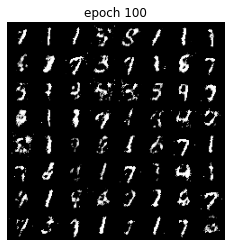

Epoch 100 of 100
Generator loss: 1.93742779, Discriminator loss: 0.80672475


In [31]:
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 

        #get the input to device
        data[0].to(device)

        # optimize discriminator
        loss_d_total = 0.0
        if epoch == 0:
          n = 32
        else:
          n = num_steps_train_discriminator
        for _ in range(n):
          generator_output = generator(create_noise(len(data[0]), nz)).detach() 
          optim_d.zero_grad()
          
          # .detach() to ensure not part of the graph

          #get the preds from discriminator on fake and true data
          gen_disc_output = discriminator(generator_output)
          true_data_output = discriminator(data[0])

          #optimize the loss
          
          disc_loss_fake, disc_loss_real  = discriminator_loss(gen_disc_output, true_data_output) #between fake and true images
          disc_loss_fake.backward()
          disc_loss_real.backward()
          optim_d.step()

          #increase counter
          loss_d_total += (disc_loss_fake+disc_loss_real).detach().cpu().numpy()
    
        # optimize generator
        optim_g.zero_grad()
        generator_output = generator(create_noise(len(data[0]), nz))
        gen_loss = generator_loss(generator_output)
        gen_loss.backward()
        optim_g.step()

        loss_g += gen_loss.detach().cpu().numpy()
        loss_d += loss_d_total / num_steps_train_discriminator
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [32]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [33]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

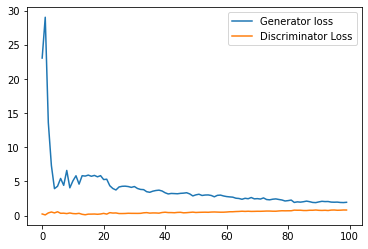

In [34]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')